# Coefficients of Even and Odd modes in terms of transmission matrix entries.

Here we study how the entries of M appear as coefficients in modes for symmetric structures.  Special interest in finding Naa term in integral coefficient system.

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from scipy.linalg import eig
from fiberamp.fiber.microstruct.bragg import plotlogf, plotlogf_real
from scipy.optimize import newton
%matplotlib widget

In [109]:
A = SlabExact(ns=[1.4, 1.5, 1.4], ts=[1e-6, 1e-6, 1e-6], wl=.9e-6,
              symmetric=True) # Need symmetric interfaces for properties to hold.

# A = SlabExact(ns=[1, 2, 2.5, 1], ts = [1e-6, 2e-6, 2e-6, 1e-6], xrefs=[100, 100, 100, 100], scale=1e-6,
#              wl=1.8e-6, symmetric=True)  

In [110]:
A.transmission_matrix_Z?

Signature:
A.transmission_matrix_Z(
    Z0,
    field_type='TE',
    up_to_region=-1,
    direction='LR',
)
Docstring: Total product of TE transfer matrices.
File:      ~/local/slab/slab.py
Type:      method

In [111]:
A.transmission_matrix_Z(1)

array([[-1.58354621e+00-0.14618215j,  1.82863971e-16-1.23652247j],
       [ 1.68663946e-16+1.23652247j, -1.58354621e+00+0.14618215j]])

In [197]:
def coeffs(Z, sign='1'):
    
    M = A.transmission_matrix_Z(Z)
    detM = M[...,0,0] * M[...,1,1] -  M[...,1,0] * M[...,0,1] 
    b = int(sign) * np.sqrt(-detM * M[...,0,1]/M[...,1,0], dtype=complex)
    
    v1 = -(M[...,0,1] - b)
    v2 = M[...,0,0]
    c = v1.conj() + v2.conj()
    
    v1 *= c
    v2 *= c
    
    return 2 * (v1*v1.conj() + v2*v2.conj())

def Ms(Z, sign='1'):
    
    M = A.transmission_matrix_Z(Z)    
    return 4 * M[...,0,0] * M[...,1,1]

both = lambda z: coeffs(z) * coeffs(z, sign='-1')


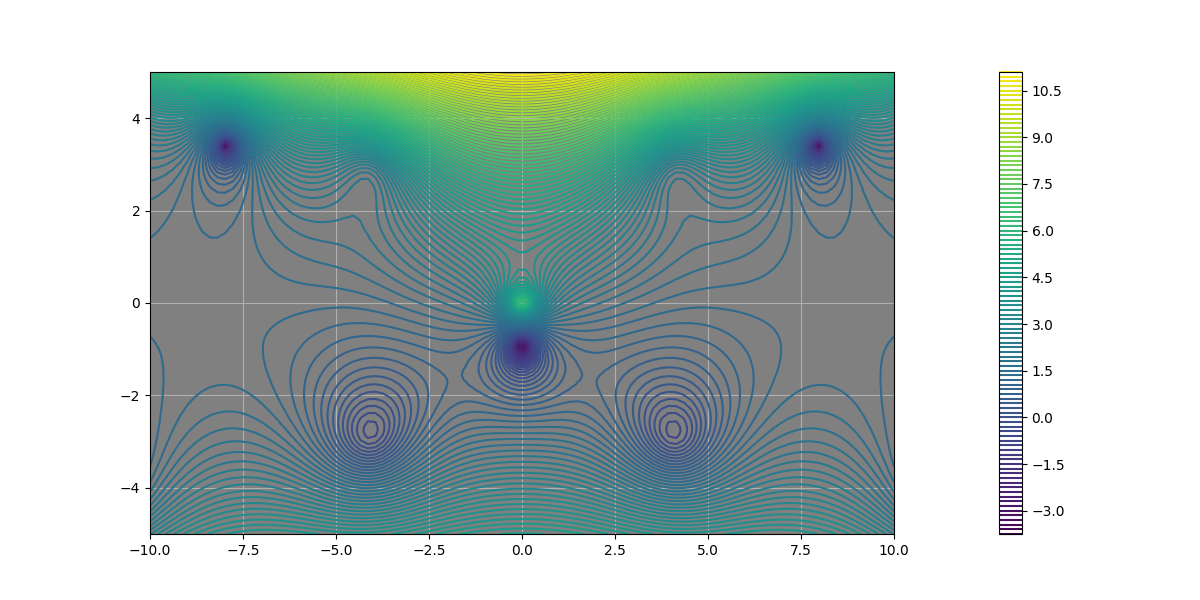

In [184]:
plotlogf(coeffs, -10,10,-5,5, iref=100, rref=100, levels=100)

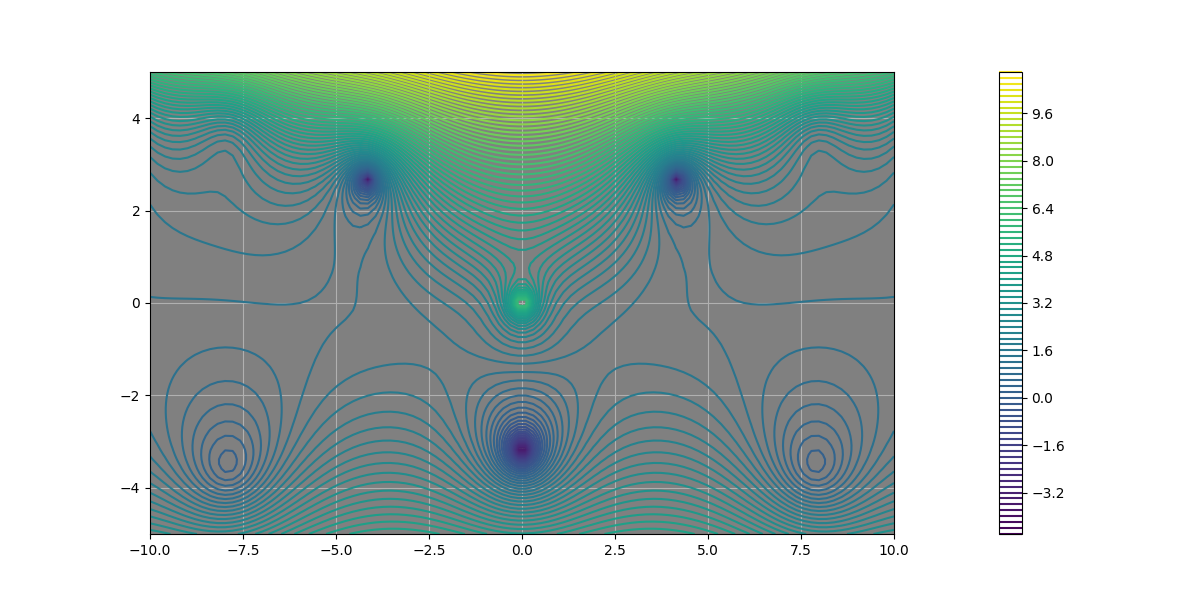

In [185]:
plotlogf(coeffs, -10,10,-5,5, '-1', iref=100, rref=100, levels=100)

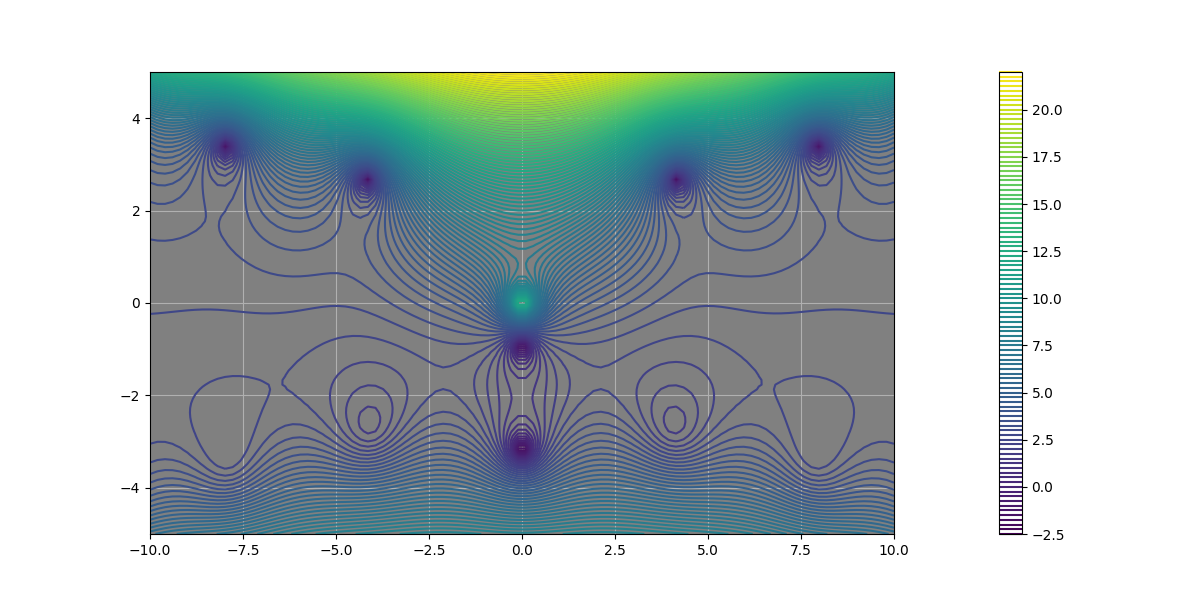

In [187]:
plotlogf(both, -10,10,-5,5, iref=100, rref=100, levels=100)

In [195]:
newton(both, np.array(-1j)), newton(both, np.array(4+3.15j))

((-0.01168526079883815-1.0116852607988331j),
 (3.6201283392669694+2.910680853738097j))

In [196]:
newton(Ms, np.array(-1j)),  newton(Ms, np.array(4+3.15j))

((1.2333749399084624e-16-0.9314785467776031j),
 (4.169295638205733+2.6752075115315397j))

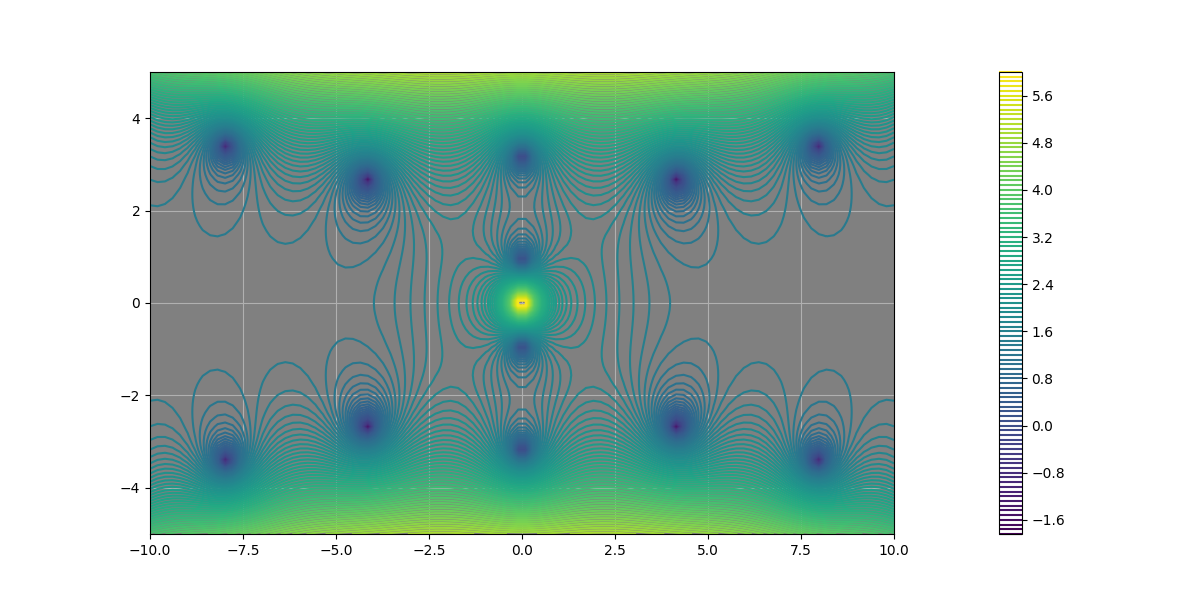

In [186]:
plotlogf(Ms, -10,10,-5,5, iref=100, rref=100, levels=100)